In [15]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Loading
df = pd.read_csv("./sample_data/data_jobs.csv")

In [16]:
# Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [17]:
df = df[df["job_title_short"] == "Data Analyst"]

In [18]:
df_exploded = df.explode("job_skills").copy()

In [22]:
df_exploded = df_exploded.groupby(by="job_skills").agg(
    {
        
        "job_skills":"count",
        "salary_year_avg":"median"        
        
        
    }
    
    
)

In [29]:
df_exploded = df_exploded.rename(columns={"job_skills":"skill_count", "salary_year_avg":"median_salary"})

In [35]:
skills_stat = df_exploded.sort_values("skill_count",ascending=False).head(10)

In [36]:
skills_stat

,skill_count,median_salary
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
r,29996,92527.5
sas,27998,90000.0
powerpoint,13822,85000.0
word,13562,80000.0


<Axes: xlabel='skill_count', ylabel='median_salary'>

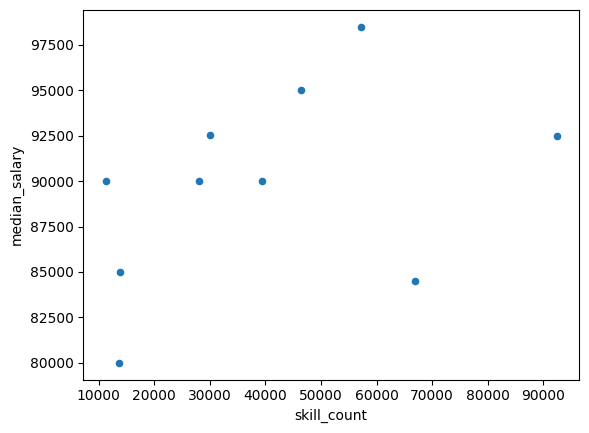

In [39]:
skills_stat.plot(kind="scatter", x="skill_count", y="median_salary")